In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('notebook', font_scale=1.3)
sns.set_style('white')

# Likelihood

## LOO

In [267]:
import json
ids = ['treatment', 'data_type']
df = pd.read_csv('results/LOO_results_to_plot.csv')
df = pd.wide_to_long(df, ['fit', 'opt'], ids, 'method', sep='_', suffix=r'\w+').reset_index()

df = df.loc[~(df.method.str.endswith('_mean') | df.method.str.endswith('_std'))]
df['model'] = df.method.apply(lambda x: x.split('_')[0])
df['trained_on'] = df.method.apply(lambda x: {'cv_neg': 'Competing', 'cv_pos': 'Common'}[x.split('_', 1)[1]])
df = pd.melt(df, id_vars=['treatment', 'trained_on', 'data_type', 'minimum', 'model'], 
             value_vars=['fit', 'opt'], var_name='train_type', value_name='loss')

df.train_type = df.train_type.str.replace('fit', 'Fitted')
df.train_type = df.train_type.str.replace('opt', 'Optimized')

df.loss = df.loss.apply(lambda x: json.loads(x.replace('Any', '')))
n_cv = len(df.loss[0])
dfs = []
for i in range(n_cv):
    df1 = df.copy()
    df1.loss = df.loss.apply(lambda x: x[i])
    dfs.append(df1)
df = pd.concat(dfs)

/usr/local/lib/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


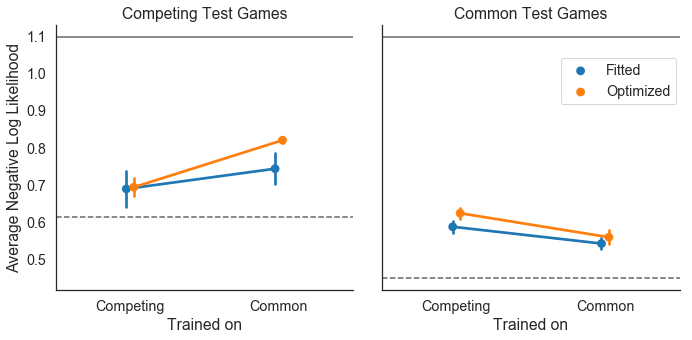

In [273]:
#palette={'Competing': '#e54242', 'Common': '#46c5ff'},
g = sns.catplot('trained_on', 'loss', hue='train_type',
                col='treatment', kind='point', sharey=True, dodge=True,
                legend=False,
                data=df.query('model == "mh" and data_type == "test"'))
g.set_xlabels('Trained on')
# g.set_xticklabels(['Fit', 'Optimized'])
g.set_ylabels('Average Negative Log Likelihood')
g.set_titles('{col_name} Test Games')

min_loss = df.query('data_type == "test"').groupby('treatment').minimum.mean()

g.axes.flat[0].axhline(min_loss['Competing'], ls='--', c='k', alpha=0.6)
g.axes.flat[1].axhline(min_loss['Common'], ls='--', c='k', alpha=0.6)
g.axes.flat[0].axhline(-np.log(1/3), ls='-', c='k', alpha=0.6)
g.axes.flat[1].axhline(-np.log(1/3), ls='-', c='k', alpha=0.6)
plt.legend(loc=(0.6, 0.7))

plt.savefig('figs/loo_test_games.pdf')

## First-Last

In [5]:
ids = ['treatment', 'data_type']
df = pd.read_csv('results/FirstLast_results_to_plot.csv')
df = pd.wide_to_long(df, ['fit', 'opt'], ids, 'method', sep='_', suffix=r'\w+').reset_index()
df['model'] = df.method.apply(lambda x: x.split('_')[0])
df['trained_on'] = df.method.apply(lambda x: {'neg': 'Competing', 'pos': 'Common'}[x.split('_')[1]])
df = pd.melt(df, id_vars=['treatment', 'trained_on', 'data_type', 'minimum', 'model'], 
             value_vars=['fit', 'opt'], var_name='train_type', value_name='loss')
df.train_type = df.train_type.str.replace('fit', 'Fitted')
df.train_type = df.train_type.str.replace('opt', 'Optimized')


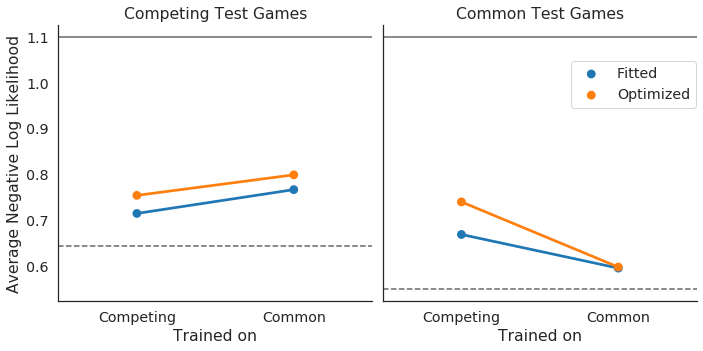

In [6]:
g = sns.catplot('trained_on', 'loss', hue='train_type', 
            col='treatment', kind='point', sharey=True,
                legend=False,
#             palette={'Competing': '#e54242', 'Common': '#46c5ff'},
            data=df.query('model == "mh" and data_type == "test"'))
g.set_xlabels('Trained on')
# g.set_xticklabels(['Fit', 'Optimized'])
g.set_ylabels('Average Negative Log Likelihood')
g.set_titles('{col_name} Test Games')

min_loss = df.query('data_type == "test"').groupby('treatment').minimum.mean()
plt.legend(loc=(0.6, 0.7))
g.axes.flat[0].axhline(min_loss['Competing'], ls='--', c='k', alpha=0.6)
g.axes.flat[1].axhline(min_loss['Common'], ls='--', c='k', alpha=0.6)
g.axes.flat[0].axhline(-np.log(1/3), ls='-', c='k', alpha=0.6)
g.axes.flat[1].axhline(-np.log(1/3), ls='-', c='k', alpha=0.6)
plt.savefig('figs/fl_test_games.pdf')

## Deep Heuristics

In [9]:
ids = ['treatment', 'data_type']
df = pd.read_csv('results/FirstLast_results_to_plot_deep.csv')
df = pd.wide_to_long(df, ['fit', 'opt'], ids, 'method', sep='_', suffix=r'\w+').reset_index()
df['model'] = df.method.apply(lambda x: x.split('_')[0])
df['trained_on'] = df.method.apply(lambda x: {'neg': 'Competing', 'pos': 'Common'}[x.split('_')[1]])
df = pd.melt(df, id_vars=['treatment', 'trained_on', 'data_type', 'minimum', 'model'], 
             value_vars=['fit', 'opt'], var_name='train_type', value_name='loss')
df.train_type = df.train_type.str.replace('fit', 'Fitted')
df.train_type = df.train_type.str.replace('opt', 'Optimized')


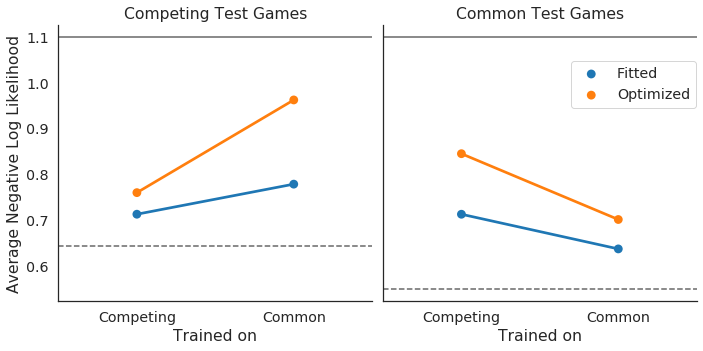

In [10]:
g = sns.catplot('trained_on', 'loss', hue='train_type', 
            col='treatment', kind='point', sharey=True,
                legend=False,
#             palette={'Competing': '#e54242', 'Common': '#46c5ff'},
            data=df.query('model == "deep" and data_type == "test"'))
g.set_xlabels('Trained on')
# g.set_xticklabels(['Fit', 'Optimized'])
g.set_ylabels('Average Negative Log Likelihood')
g.set_titles('{col_name} Test Games')

min_loss = df.query('data_type == "test"').groupby('treatment').minimum.mean()
plt.legend(loc=(0.6, 0.7))
g.axes.flat[0].axhline(min_loss['Competing'], ls='--', c='k', alpha=0.6)
g.axes.flat[1].axhline(min_loss['Common'], ls='--', c='k', alpha=0.6)
g.axes.flat[0].axhline(-np.log(1/3), ls='-', c='k', alpha=0.6)
g.axes.flat[1].axhline(-np.log(1/3), ls='-', c='k', alpha=0.6)
plt.savefig('figs/fl_test_games_deep.pdf')

## Alternatives

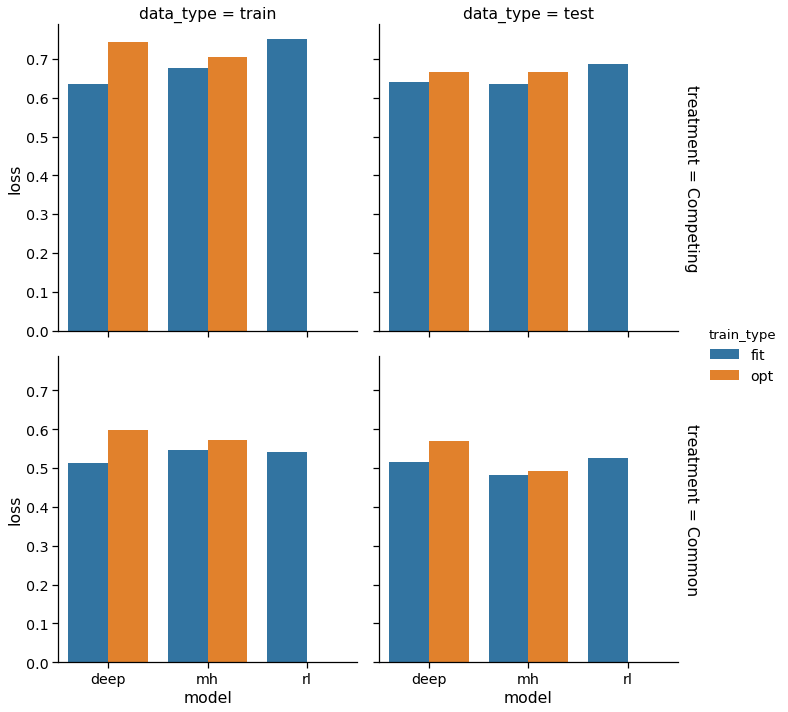

In [62]:
sns.catplot('model', 'loss', hue='train_type', col='data_type', 
            row='treatment', kind='bar', sharey=True, margin_titles=True,
            data=df.query('treatment == trained_on'))

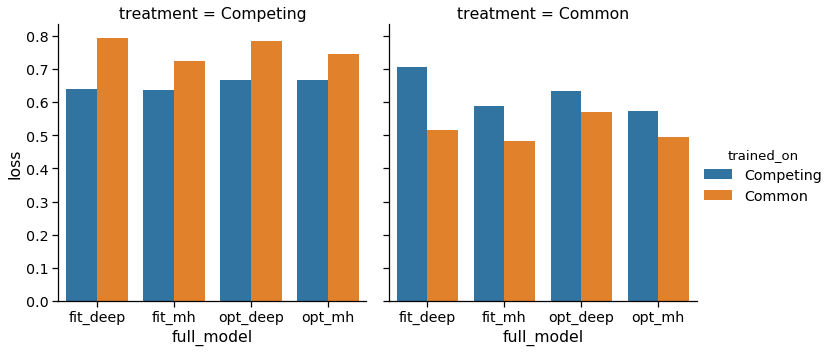

In [90]:
df['full_model'] = df['train_type'] + '_' + df.model
df.full_model = df['full_model'].str.replace('fit_rl', 'RL')
order = ['fit_deep', 'fit_mh', 'opt_deep', 'opt_mh']
sns.catplot('full_model', 'loss', hue='trained_on', 
            col='treatment', kind='bar', sharey=True, order=order,
            data=df.query('data_type == "test"'))

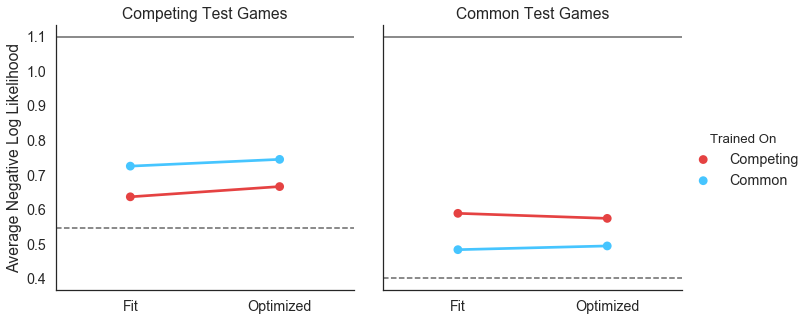

In [152]:
df['full_model'] = df['train_type'] + '_' + df.model
df.full_model = df['full_model'].str.replace('fit_rl', 'RL')
order = ['fit_deep', 'fit_mh', 'opt_deep', 'opt_mh']
g = sns.catplot('train_type', 'loss', hue='trained_on', 
            col='treatment', kind='point', sharey=True,
            palette={'Competing': '#e54242', 'Common': '#46c5ff'},
            data=df.query('model == "mh" and data_type == "test"'))
g.set_xlabels('')
g.set_xticklabels(['Fit', 'Optimized'])
g.set_ylabels('Average Negative Log Likelihood')
g.set_titles('{col_name} Test Games')
g._legend.set_title('Trained On')

min_loss = df.query('data_type == "test"').groupby('treatment').minimum.mean()

g.axes.flat[0].axhline(min_loss['Competing'], ls='--', c='k', alpha=0.6)
g.axes.flat[1].axhline(min_loss['Common'], ls='--', c='k', alpha=0.6)
g.axes.flat[0].axhline(-np.log(1/3), ls='-', c='k', alpha=0.6)
g.axes.flat[1].axhline(-np.log(1/3), ls='-', c='k', alpha=0.6)


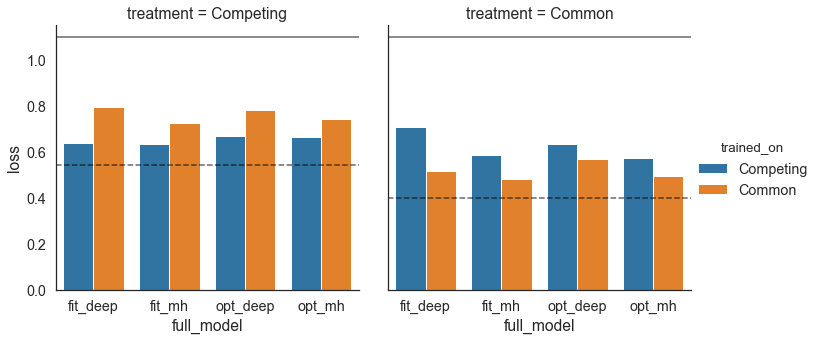

In [170]:
df['full_model'] = df['train_type'] + '_' + df.model
df.full_model = df['full_model'].str.replace('fit_rl', 'RL')
g = sns.catplot('full_model', 'loss', hue='trained_on', 
            col='treatment', kind='bar', sharey=True,
#             palette={'Competing': '#e54242', 'Common': '#46c5ff'},
            order=['fit_deep', 'fit_mh', 'opt_deep', 'opt_mh'],
            data=df.query('data_type == "test"'))

# g.set_xlabels('')
# g.set_xticklabels(['Fit', 'Optimized'])
# g.set_ylabels('Average Negative Log Likelihood')
# g.set_titles('{col_name} Test Games')
# g._legend.set_title('Trained On')

min_loss = df.query('data_type == "test"').groupby('treatment').minimum.mean()
g.axes.flat[0].axhline(min_loss['Competing'], ls='--', c='k', alpha=0.6)
g.axes.flat[1].axhline(min_loss['Common'], ls='--', c='k', alpha=0.6)
g.axes.flat[0].axhline(-np.log(1/3), ls='-', c='k', alpha=0.6)
g.axes.flat[1].axhline(-np.log(1/3), ls='-', c='k', alpha=0.6)

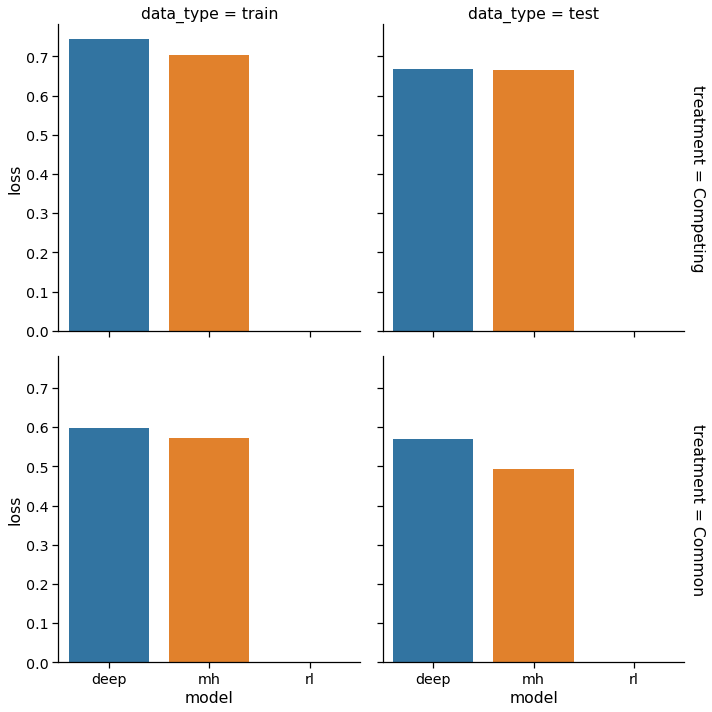

In [64]:
sns.catplot('model', 'loss', col='data_type', 
            row='treatment', kind='bar', sharey=True, margin_titles=True,
            data=df.query('treatment == trained_on and train_type == "opt"'))

# Comparison Games

In [247]:
negative = pd.read_csv('data/processed/e3jydlve_play_distributions.csv').query('type == "comparison"')
positive = pd.read_csv('data/processed/nlesp5ss_play_distributions.csv').query('type == "comparison"')

from ast import literal_eval
def array(x):
    return np.array(literal_eval(x))

FileNotFoundError: File b'data/processed/e3jydlve_play_distributions.csv' does not exist

In [248]:
positive_model = pd.read_csv('results/common_comparison_model.csv')
negative_model = pd.read_csv('results/competing_comparison_model.csv')

n_game = 6
size = 3
gs = GridSpec(4 * n_game, 4 * 2, figure=plt.figure(figsize=(size * 2, size * n_game)))

for idx in range(n_game):
    g = array(positive.iloc[idx].row_game)
    for i, name, d in [(0, "Positive", positive_model), (1, "Negative", negative_model)]:
        title = f"{name} Correlation" if idx == 0 else None
        plot_game(title, g, array(d.iloc[idx].play), array(d.iloc[idx].play), idx, i)

plt.savefig('figs/model_comparison_games.pdf', bbox_inches='tight')

NameError: name 'GridSpec' is not defined

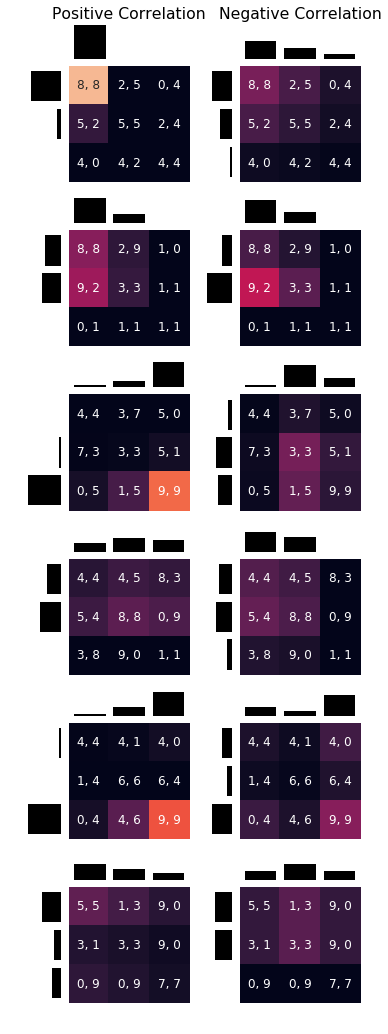

In [12]:
from matplotlib.gridspec import GridSpec

n_game = 6
size = 3
gs = GridSpec(4 * n_game, 4 * 2, figure=plt.figure(figsize=(size * 2, size * n_game)))

def plot_game(title, g, row_play, col_play, top, left):
    top *= 4; left *= 4
    plt.sca(plt.subplot(gs[top+1:top+4, left+1:left+4]))
    row_payoff = g[:, :, 0]
    col_payoff = g[:, :, 1]
    pay = np.array([[f'{row_payoff[i, j]}, {col_payoff[i, j]}' for j in range(3)] for i in range(3)])
    play = row_play[:, None] * col_play
    sns.heatmap(play, vmin=0, vmax=1, annot=pay, fmt='s', annot_kws=dict(size=12), cbar=False)
    plt.xticks([])
    plt.yticks([])

    plt.sca(plt.subplot(gs[top, left+1:left+4]))
    plt.bar(range(3), col_play, color='k')
    # plt.yticks([])
    plt.ylim(0, 1)
    plt.axis('off')
    plt.title(title)

    plt.sca(plt.subplot(gs[top+1:top+4, left]))
    plt.barh(range(3), row_play, color='k')
    # plt.yticks([])
    plt.xlim(0, 1)
    plt.axis('off')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()

for idx in range(n_game):
    g = array(positive.iloc[idx].row_game)
    for i, name, d in [(0, "Positive", positive), (1, "Negative", negative)]:
        title = f"{name} Correlation" if idx == 0 else None
        plot_game(title, g, array(d.iloc[idx].row_play), array(d.iloc[idx].col_play), idx, i)
        
plt.savefig('figs/comparison_games.pdf', bbox_inches='tight')